<a href="https://colab.research.google.com/github/Arafat4341/hand_written_digit_recognizer/blob/master/Digit_recognizer_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# we shall load data directly from kaggle using kaggle api
!pip install kaggle


In [0]:
# now we uploaded our kaggle.json file to work with the api
from google.colab import files
files.upload()

In [0]:
# we set the directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# downloading the dataset
!kaggle competitions download -c digit-recognizer


 81% 59.0M/73.2M [00:00<00:00, 60.0MB/s]
100% 73.2M/73.2M [00:00<00:00, 94.0MB/s]
 82% 40.0M/48.8M [00:00<00:00, 52.2MB/s]
100% 48.8M/48.8M [00:00<00:00, 123MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 27.7MB/s]


In [0]:
# checked the data

import pandas as pd

Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# preparing the training and testing data
x_train = (Train.iloc[:, 1:].values).astype('float32') # all the pixel values except the label
y_train = (Train.iloc[:, 0].values).astype('int32') # the labels

x_test = Test.values.astype('float32')

x_train, y_train

In [0]:
# initially the data dimension was: 42000, 784
# We change the dimension to 42000, 28, 28
# That means we shall have 42000 rows of 28x28 pixel values of training digits
# Each 1x784 row is now a 28x28 row

x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_train.shape

(42000, 28, 28)

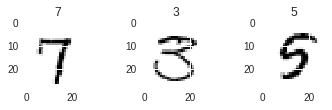

In [0]:
# visualization
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(6,9):
  plt.subplot(330 + (i+1))
  plt.imshow(x_train[i], cmap=plt.get_cmap('binary'))
  plt.title(y_train[i])
 
 

In [0]:
import tensorflow as tf

#normalize our data (data is on a 0-255 scale, we make it 0-1 scale)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [0]:
# build our model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #we have a 28x28 matrics as input. We want it to be a 1 dimentional array.Thats why we used flatten
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
# complie the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
42000/42000 [==============================] - 7s 164us/sample - loss: 0.3082 - acc: 0.9095
Epoch 2/3
42000/42000 [==============================] - 6s 147us/sample - loss: 0.1286 - acc: 0.9601
Epoch 3/3
42000/42000 [==============================] - 6s 148us/sample - loss: 0.0871 - acc: 0.9730


In [0]:
# making prediction
res = model.predict(x_test)

In [0]:
# We got the result in probability distribution format
# We have to convert the result into actual label digit

import numpy as np

f = []

for i in range(28000):
  f.append(np.argmax(res[i]))


In [0]:
# making output file

submissions=pd.DataFrame({"ImageId": list(range(1,len(f)+1)),
                         "Label": f})
submissions.to_csv("result.csv", index=False, header=True)